In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from helpers import *

# Media Coverage vs Vote intention

We will now introduce a correlation analysis between media coverage and vote intentions for both candidates of 2012, 2016 and 2020 elections.
We will define media coverage with multiple metrics :
* aggregated occurrences of candidate's name in the QuoteBank
* TO BE CONTINUED

and some covariates :
* sentiment of media coverage

In [2]:
# load the data
DATA_PATH = "../Data/"
MODEL = 'TextBlob'
sentiment_analysis_datapath = f"{DATA_PATH}preprocessed/"

df_obama_2012_sa = pd.read_csv(f'{sentiment_analysis_datapath}sentiment_obama_2012_{MODEL}.csv')
df_romney_2012_sa = pd.read_csv(f'{sentiment_analysis_datapath}sentiment_romney_2012_{MODEL}.csv')

df_trump_2016_sa = pd.read_csv(f'{sentiment_analysis_datapath}sentiment_trump_2016_{MODEL}.csv')
df_clinton_2016_sa = pd.read_csv(f'{sentiment_analysis_datapath}sentiment_clinton_2016_{MODEL}.csv')

df_trump_2020_sa = pd.read_csv(f'{sentiment_analysis_datapath}sentiment_trump_2020_{MODEL}.csv')
df_biden_2020_sa = pd.read_csv(f'{sentiment_analysis_datapath}sentiment_biden_2020_{MODEL}.csv')

df_obama_2012_sa.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,month,type,candidate,quotation_tokenized,quotation_stemmed,quotation_lemmatized,quotation_conc_lemmatized,quotation_polarity,quotation_subjectivity
0,2012-02-28-019791,"he used to say, `what is it about working men ...",president obama,['Q76'],2012-02-28 18:15:46,4,"[['president obama', '0.5761'], ['None', '0.18...",['http://thecaucus.blogs.nytimes.com/2012/02/2...,C,Feb,NY Times,Barack Obama,"['', 'used', 'to', 'say', 'what', '', 'it', ''...","['', 'use', 'say', '', '', 'work', 'men', 'wom...","['', 'used', 'say', '', '', 'working', 'men', ...",used say working men woman find offensive,0.000000,0.000000
1,2012-09-11-054851,"no matter how many years pass, no matter how m...",michelle obama,['Q13133'],2012-09-11 14:26:35,5,"[['michelle obama', '0.3999'], ['president oba...",['http://thecaucus.blogs.nytimes.com/2012/09/1...,C,Sep,NY Times,Barack Obama,"['no', 'matter', 'how', 'many', 'years', 'pass...","['matter', 'mani', 'year', 'pass', 'matter', '...","['matter', 'many', 'year', 'pas', 'matter', 'm...",matter many year pas matter many time come tog...,0.500000,0.500000
2,2012-01-09-046115,"obviously, this was not easy news to hear,",president barack obama,['Q76'],2012-01-09 20:48:40,15,"[['president barack obama', '0.3927'], ['willi...",['http://mywabashvalley.com/fulltext/?nxd_id=2...,C,Jan,NY Times,Barack Obama,"['', 'this', 'was', 'not', 'easy', 'news', 'to...","['', 'easi', 'news', 'hear']","['', 'easy', 'news', 'hear']",easy news hear,0.433333,0.833333
3,2012-04-03-059806,"see energy prices rise,",president obama,['Q76'],2012-04-03 03:43:25,4,"[['president obama', '0.4714'], ['None', '0.39...",['http://nytimes.com/2012/04/03/us/politics/ro...,C,Apr,NY Times,Barack Obama,"['see', 'energy', 'prices', 'rise']","['see', 'energi', 'price', 'rise']","['see', 'energy', 'price', 'rise']",see energy price rise,0.000000,0.000000
4,2012-11-03-055227,"you do want to be able to trust your president,",president obama,['Q76'],2012-11-03 23:53:48,1,"[['president obama', '0.6007'], ['None', '0.39...",['http://nytimes.com/2012/11/04/us/politics/ob...,C,Nov,NY Times,Barack Obama,"['you', 'do', 'want', 'to', '', '', 'to', 'tru...","['want', '', '', 'trust', 'presid']","['want', '', '', 'trust', 'president']",want trust president,0.000000,0.000000


In [3]:
# compute aggregate of candidate's name occurrences by month
df_obama_2012_occurrences_month = df_obama_2012_sa['month'].value_counts().rename('Obama_2012')
df_romney_2012_occurrences_month = df_romney_2012_sa['month'].value_counts().rename('Romney_2012')
df_trump_2016_occurrences_month = df_trump_2016_sa['month'].value_counts().rename('Trump_2016')
df_clinton_2016_occurrences_month = df_clinton_2016_sa['month'].value_counts().rename('Clinton_2016')
df_trump_2020_occurrences_month = df_trump_2020_sa['month'].value_counts().rename('Trump_2020')
df_biden_2020_occurrences_month = df_biden_2020_sa['month'].value_counts().rename('Biden_2020')

df_candidates_occurrences_month = pd.concat(
    [df_obama_2012_occurrences_month, df_romney_2012_occurrences_month, df_clinton_2016_occurrences_month,
     df_trump_2016_occurrences_month, df_biden_2020_occurrences_month, df_trump_2020_occurrences_month], axis=1)

new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
df_candidates_occurrences_month = df_candidates_occurrences_month.reindex(new_order, axis=0)
df_candidates_occurrences_month

,Obama_2012,Romney_2012,Clinton_2016,Trump_2016,Biden_2020,Trump_2020
Jan,1147,2044,6,9,807.0,2362.0
Feb,952,1242,177,443,745.0,2083.0
Mar,1265,1278,2,28,872.0,1722.0
Apr,925,1193,169,532,309.0,809.0
May,1661,1263,450,1368,NaN,NaN
Jun,1384,1235,8,96,NaN,NaN
Jul,1350,1545,1210,2627,NaN,NaN
Aug,1404,2402,1062,2384,NaN,NaN
Sep,1590,1633,1533,2572,NaN,NaN
Oct,1466,1978,12,32,NaN,NaN


First-of-all we observe no data beyond April for 2020 elections due to its closeness in time. This will be accounted for as we will perform analysis on a monthly basis. Secondly, all three elections seem to have different scales as we can see above ['Mar']. This rises the question :
#### *Can QuoteBank be treated as an accurate representation of media coverage ?*
This would be the case if QuoteBank was a complete set of all *words* used in the newspaper for the last 20 years which cannot be feasible. QuoteBank is biased but we suppose its bias doesn't interfere with our correlation (find another argument i guess ?).


Finally, the data for 2012 seem to be the more cohesive one with more even data across months.

Let's aggregate vote intentions.

In [7]:
df_2012 = pd.read_csv('../Data/Scrapped/polls_2012.csv').rename(
    columns={"Obama (D)": "Obama_2012", "Romney (R)": "Romney_2012"})
df_2016 = pd.read_csv('../Data/Scrapped/polls_2016.csv').rename(
    columns={"Clinton (D)": "Clinton_2016", "Trump (R)": "Trump_2016"})
df_2020 = pd.read_csv('../Data/Scrapped/polls_2020.csv').rename(
    columns={"Biden (D)": "Biden_2020", "Trump (R)": "Trump_2020"})

df_2012 = average_polls_df_by_month(df_2012, year=2012)
df_2016 = average_polls_df_by_month(df_2016, year=2016)
df_2020 = average_polls_df_by_month(df_2020, year=2020)

df_candidates_vote_intentions_month = pd.concat([df_2012, df_2016, df_2020], axis=1).reindex(new_order, axis=0)
df_candidates_vote_intentions_month

,Obama_2012,Romney_2012,Clinton_2016,Trump_2016,Biden_2020,Trump_2020
Date_start,,,,,,
Jan,46.770588,44.776471,47.733333,44.700000,50.044444,45.100000
Feb,49.062500,43.875000,45.714286,41.571429,50.222222,45.000000
Mar,47.733333,43.400000,49.636364,39.000000,49.428571,43.071429
Apr,47.100000,44.650000,46.888889,40.222222,47.705882,42.000000
May,46.066667,44.200000,43.818182,42.181818,48.052632,42.421053
Jun,46.941176,44.294118,44.814815,39.222222,50.150000,40.750000
Jul,46.764706,44.529412,44.937500,41.906250,49.285714,41.523810
Aug,47.200000,45.100000,47.076923,41.153846,49.333333,41.750000
Sep,48.967742,45.032258,46.600000,43.714286,49.820513,42.641026


We now have all vote intentions in a single dataframe, grouped by month. Unfortunately we have (for now) missing values for April 2016.

In [9]:
df1 = df_candidates_vote_intentions_month  # remove december because we don't have december data for occurences
df2 = df_candidates_occurrences_month

normalize = True
print(f'== Pearson coefficient of Vote intentions(%) vs #Occurrences of candidate\'s name by month ==')
for i, candidate in enumerate(['Obama_2012', 'Romney_2012', 'Trump_2016', 'Clinton_2016', 'Biden_2020', 'Trump_2020']):
    df1_sub = df_normalize(df1[candidate], activate=normalize)
    df2_sub = df_normalize(df2[candidate], activate=normalize)
    mask = ~np.isnan(df1_sub) & ~np.isnan(df2_sub)

    candidate_vote_intentions_month = df1_sub[mask]
    candidate_occurrences_month = df2_sub[mask]
    r, p = stats.pearsonr(candidate_vote_intentions_month, candidate_occurrences_month)
    print(
        f'{candidate: <14} | Pearson: {r:<8.3f} | p-value: {p:.3f} | over {len(candidate_vote_intentions_month)} months')

== Pearson coefficient of Vote intentions(%) vs #Occurrences of candidate's name by month ==
Obama_2012     | Pearson: -0.431   | p-value: 0.186 | over 11 months
Romney_2012    | Pearson: -0.240   | p-value: 0.477 | over 11 months
Trump_2016     | Pearson: 0.132    | p-value: 0.698 | over 11 months
Clinton_2016   | Pearson: -0.278   | p-value: 0.408 | over 11 months
Biden_2020     | Pearson: 0.877    | p-value: 0.123 | over 4 months
Trump_2020     | Pearson: 0.946    | p-value: 0.054 | over 4 months


## Pearson coefficient to be computed by newspapers.


== Pearson coefficient of Vote intentions(%) vs #Occurrences of candidate's name by month ==


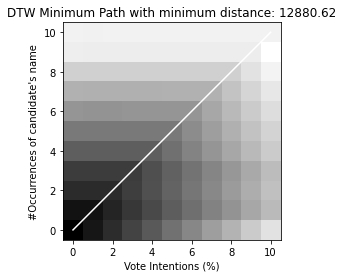

Obama_2012     | minimum distance: 12880.617 | p-value: 0.000 | over 11 months


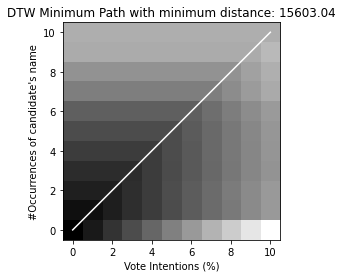

Romney_2012    | minimum distance: 15603.041 | p-value: 0.000 | over 11 months


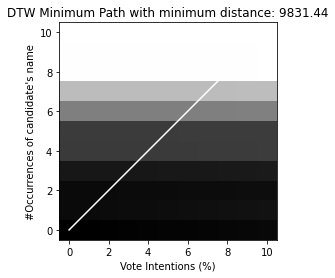

Trump_2016     | minimum distance: 9831.440 | p-value: 0.000 | over 11 months


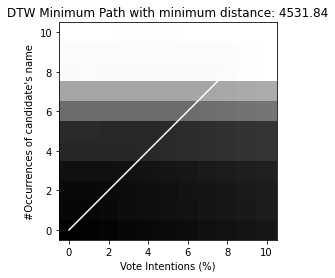

Clinton_2016   | minimum distance: 4531.837 | p-value: 0.000 | over 11 months


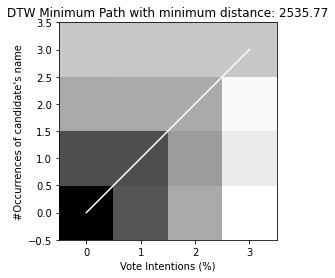

Biden_2020     | minimum distance: 2535.768 | p-value: 0.000 | over 4 months


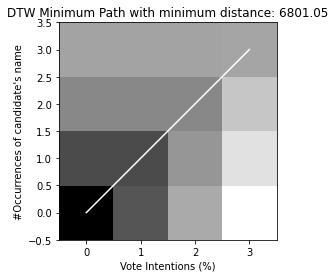

Trump_2020     | minimum distance: 6801.054 | p-value: 0.000 | over 4 months


In [7]:
from dtw import dtw, accelerated_dtw

#axes, f = plt.subplot(shape=(6, 1))

print(f'== Pearson coefficient of Vote intentions(%) vs #Occurrences of candidate\'s name by month ==')
for i, candidate in enumerate(['Obama_2012', 'Romney_2012', 'Trump_2016', 'Clinton_2016', 'Biden_2020', 'Trump_2020']):
    df1_sub = df1[candidate]
    df2_sub = df2[candidate]
    mask = ~np.isnan(df1_sub) & ~np.isnan(df2_sub)

    candidate_vote_intentions_month = df1_sub[mask]
    candidate_occurrences_month = df2_sub[mask]
    d1 = candidate_vote_intentions_month.interpolate().values
    d2 = candidate_occurrences_month.interpolate().values
    d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1, d2, dist='euclidean')
    plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
    plt.plot(path[0], path[1], 'w')
    plt.xlabel('Vote Intentions (%)')
    plt.ylabel('#Occurrences of candidate\'s name')
    plt.title(f'DTW Minimum Path with minimum distance: {np.round(d, 2)}')
    plt.show()
    print(
        f'{candidate: <14} | minimum distance: {d:<8.3f} | p-value: {0:.3f} | over {len(candidate_vote_intentions_month)} months')